# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

In [4]:
!pip install geopy folium

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------------- ------------------- 61.4/125.4 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------  122.9/125.4 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 108.4/108.4 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [10]:
import requests
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import folium
import random

import os
from dotenv import load_dotenv

In [12]:
# Use double quotes to assign your API key to private_api_key variable as a string
# .env to prevent this
# Load environment variables from .env file
load_dotenv(dotenv_path="./data/.env")

# Access the private API key
private_api_key = os.getenv("METEOSTAT_PRIVATE_KEY")

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [15]:
# Define API details
api_url = "https://meteostat.p.rapidapi.com/point/daily"
api_key = private_api_key
headers = {
    'x-rapidapi-host': "meteostat.p.rapidapi.com",
    'x-rapidapi-key': api_key
}

In [17]:
# Parameters: Latitude, Longitude, Altitude, Start and End dates
# Define parameters for each city
params_berlin = {
    'lat': 52.5244,  # Latitude for Berlin
    'lon': 13.4105,  # Longitude for Berlin
    'alt': 43,       # Altitude in meters
    'start': '2023-01-01',  # Start date
    'end': '2023-12-31'     # End date
}

params_munich = {
    'lat': 48.137154,  # Latitude for Munich
    'lon': 11.576124,  # Longitude for Munich
    'start': '2023-01-01',  # Start date
    'end': '2023-12-31'     # End date
}

params_frankfurt = {
    'lat': 50.110924,  # Latitude for Frankfurt
    'lon': 8.682127,   # Longitude for Frankfurt
    'start': '2023-01-01',  # Start date
    'end': '2023-12-31'     # End date
}



In [19]:
# Function to request weather data and convert to a pandas DataFrame
def get_weather_data(api_url, headers, params):
    response = requests.get(api_url, headers=headers, params=params)
    
    if response.status_code == 200:
        weather_data = response.json()['data']  # Extract data from the response
        df = pd.DataFrame(weather_data)  # Convert JSON to pandas DataFrame
        return df
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return pd.DataFrame()  # Return empty DataFrame if failed

In [21]:
# Fetch and save weather data for each city
df_berlin = get_weather_data(api_url, headers, params_berlin)
df_munich = get_weather_data(api_url, headers, params_munich)
df_frankfurt = get_weather_data(api_url, headers, params_frankfurt)

# Save each DataFrame to a CSV file
df_berlin.to_csv('weather_berlin_2023.csv', index=False)
df_munich.to_csv('weather_munich_2023.csv', index=False)
df_frankfurt.to_csv('weather_frankfurt_2023.csv', index=False)

print("Weather data for Berlin, Munich, and Frankfurt saved to CSV files.")

Weather data for Berlin, Munich, and Frankfurt saved to CSV files.


## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

In [1]:
# load foursquare api key
foursquare_api_key = 1
print(foursquare_api_key)

1


In [44]:
location = '52.5200,13.4050'  # Berlin coordinates
radius = 1000  # 1 km radius
places_url = f"https://api.foursquare.com/v3/places/search?ll={location}&radius={radius}"
headers = {'Authorization': foursquare_api_key}
response = requests.get(places_url, headers=headers)
places_data = response.json()

In [2]:
# load Google API
google_api_key = 1
google_api_key

1

In [48]:
origin = '52.5200,13.4050'  # Berlin
destination = '52.5150,13.3950'  # A destination in Berlin
directions_url = f'https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={google_api_key}'
response = requests.get(directions_url)
directions_data = response.json()

In [50]:
# Extract the route
if directions_data['status'] == 'OK':
    routes = directions_data['routes']
    for route in routes:
        print(f"Route summary: {route['summary']}")

Route summary: B2


## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

In [53]:
# function to generate random points
def generate_random_points(n_points, vehicle_type):
    """
    Generate random points within a defined area around Berlin
    """
    lat_min, lat_max = 52.50, 52.55  # Latitude range for Berlin
    lon_min, lon_max = 13.35, 13.45  # Longitude range for Berlin
    
    data = {
        'latitude': np.random.uniform(lat_min, lat_max, n_points),
        'longitude': np.random.uniform(lon_min, lon_max, n_points),
        'vehicle_type': [vehicle_type] * n_points
    }
    
    df = pd.DataFrame(data)
    
    # Introduce some missing values to simulate real-world data
    missing_indices = random.sample(range(n_points), int(n_points * 0.1))  # 10% missing values
    df.loc[missing_indices, 'vehicle_type'] = np.nan  # Missing vehicle type
    df.loc[missing_indices[:int(len(missing_indices)/2)], 'latitude'] = np.nan  # Missing latitude
    
    return df

In [55]:
# Generate 100 random bike points and 100 random scooter points
bike_df = generate_random_points(100, 'bike')
scooter_df = generate_random_points(100, 'scooter')

# Combine both datasets
vehicle_df = pd.concat([bike_df, scooter_df])

# Introduce more randomness (shuffle the data)
vehicle_df = vehicle_df.sample(frac=1).reset_index(drop=True)

# Fill missing vehicle types with 'unknown'
vehicle_df['vehicle_type'] = vehicle_df['vehicle_type'].fillna('unknown')

# Fill missing latitude and longitude with the median of the existing values
vehicle_df['latitude'] = vehicle_df['latitude'].fillna(vehicle_df['latitude'].median())
vehicle_df['longitude'] = vehicle_df['longitude'].fillna(vehicle_df['longitude'].median())

# Save the cleaned data to a CSV file
vehicle_df.to_csv('./data/cleaned_vehicle_data.csv', index=False)

In [57]:
# Create a map centered around Berlin
berlin_map = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# Add the points to the map
for idx, row in vehicle_df.iterrows():
    # Choose different marker colors for bikes and scooters
    color = 'blue' if row['vehicle_type'] == 'bike' else 'red'
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Type: {row['vehicle_type']}",
                  icon=folium.Icon(color=color)).add_to(berlin_map)

# Save the map to an HTML file
berlin_map.save('./data/berlin_vehicle_map.html')

## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


In [125]:
import pandas as pd

# Load the dataset
rental_bike_df = pd.read_csv('./data/day.csv')

# Define weather categories with descriptions
weather_categories = {
    1: 'Perfect Day',
    2: 'Cloudy Day',
    3: 'Bad Weather Day',
    4: 'Really Bad Weather Day'
}

# Update temperature bins and labels to combine freezing/cold and warm/hot
temp_bins = [-float('inf'), 10, 20, float('inf')]
temp_labels = [
    'Cold (≤ 10°C)',
    'Cool (11°C - 20°C)',
    'Warm (> 20°C)'
]

# Apply mappings
rental_bike_df['weather_description'] = rental_bike_df['weathersit'].map(weather_categories)
t_min = -8
t_max = 39
rental_bike_df['temp_celsius'] = rental_bike_df['temp'] * (t_max - t_min) + t_min  # Convert normalized temp to Celsius
rental_bike_df['temp_category'] = pd.cut(
    rental_bike_df['temp_celsius'],
    bins=temp_bins,
    labels=temp_labels
)

# Aggregate rentals by month, weather, and temperature categories
weather_temp_stats = rental_bike_df.groupby(
    ['mnth', 'weather_description', 'temp_category'],
    observed=True
)['cnt'].agg(
    Total_Rentals='sum',
    Average_Rentals='mean'
).reset_index()



# Map month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
weather_temp_stats['Month'] = weather_temp_stats['mnth'].map(month_mapping)
weather_temp_stats['Month'] = pd.Categorical(
    weather_temp_stats['Month'],
    categories=list(month_mapping.values()),
    ordered=True
)

# Display the updated statistics with recommendations
print(weather_temp_stats)


# Calculate correlations
weather_corr = rental_bike_df[['weathersit', 'cnt']].corr().loc['weathersit', 'cnt']
temp_corr = rental_bike_df['temp_celsius'].corr(rental_bike_df['cnt'])

print(f"\nCorrelation between Weather Situation and Bike Rentals: {weather_corr:.2f}")
print(f"Correlation between Temperature and Bike Rentals: {temp_corr:.2f}")


    mnth weather_description       temp_category  Total_Rentals  \
0      1     Bad Weather Day       Cold (≤ 10°C)            506   
1      1          Cloudy Day       Cold (≤ 10°C)          43580   
2      1          Cloudy Day  Cool (11°C - 20°C)           3456   
3      1         Perfect Day       Cold (≤ 10°C)          78361   
4      1         Perfect Day  Cool (11°C - 20°C)           9030   
..   ...                 ...                 ...            ...   
57    12     Bad Weather Day  Cool (11°C - 20°C)           3299   
58    12          Cloudy Day       Cold (≤ 10°C)          65217   
59    12          Cloudy Day  Cool (11°C - 20°C)          29981   
60    12         Perfect Day       Cold (≤ 10°C)          85487   
61    12         Perfect Day  Cool (11°C - 20°C)          26611   

    Average_Rentals     Month  
0        506.000000   January  
1       1894.782609   January  
2       3456.000000   January  
3       2238.885714   January  
4       4515.000000   January  
.. 

In [161]:
## How do holidays affect our rentals?

# Load the dataset
rental_bike_df

# Check the first few rows to understand the structure of the dataset
rental_bike_df.head()

# Group the data by 'holiday' to compare rental counts between holidays and non-holidays
holiday_vs_non_holiday = rental_bike_df.groupby('holiday').agg(
    total_rentals=('cnt', 'sum'),
    avg_rentals=('cnt', 'mean')
).reset_index()

holiday_vs_non_holiday

,holiday,total_rentals,avg_rentals
0,0,3214244,4527.104225
1,1,78435,3735.000000


In [247]:
data = pd.read_csv('./data/day.csv')

# Dropping the specified columns
data_filtered = data.drop(columns=['instant','dteday', 'season', 'yr', 'mnth', 'holiday', 'casual', 'registered'])

# Calculate the correlation matrix for the remaining numerical variables
correlation_matrix = data_filtered.corr()

# Extract the correlation values for 'cnt' (total rentals)
correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)

correlation_with_cnt

cnt           1.000000
atemp         0.631066
temp          0.627494
weekday       0.067443
workingday    0.061156
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [235]:
# Normalized temp to celsius
data['temp_celsius'] = data['temp'] * (39 - (-8)) - 8

# Define the rolling window size (in terms of temperature range width)
window_size = 5  # Rolling window of 5 degrees Celsius

# Sort the data by temperature for better analysis
data_sorted = data.sort_values(by='temp_celsius')

# Create a rolling mean of total rentals over a defined window of temperatures
data_sorted['rolling_mean_rentals'] = data_sorted['cnt'].rolling(window=window_size, center=True).mean()

# Find the temperature range corresponding to the maximum rolling mean of rentals
max_rentals_row = data_sorted.loc[data_sorted['rolling_mean_rentals'].idxmax()]
sweetspot_start = max_rentals_row['temp_celsius'] - (window_size / 2)
sweetspot_end = max_rentals_row['temp_celsius'] + (window_size / 2)
max_rentals = max_rentals_row['rolling_mean_rentals']

print(sweetspot_start, sweetspot_end, max_rentals)

17.7 22.7 7699.6


## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

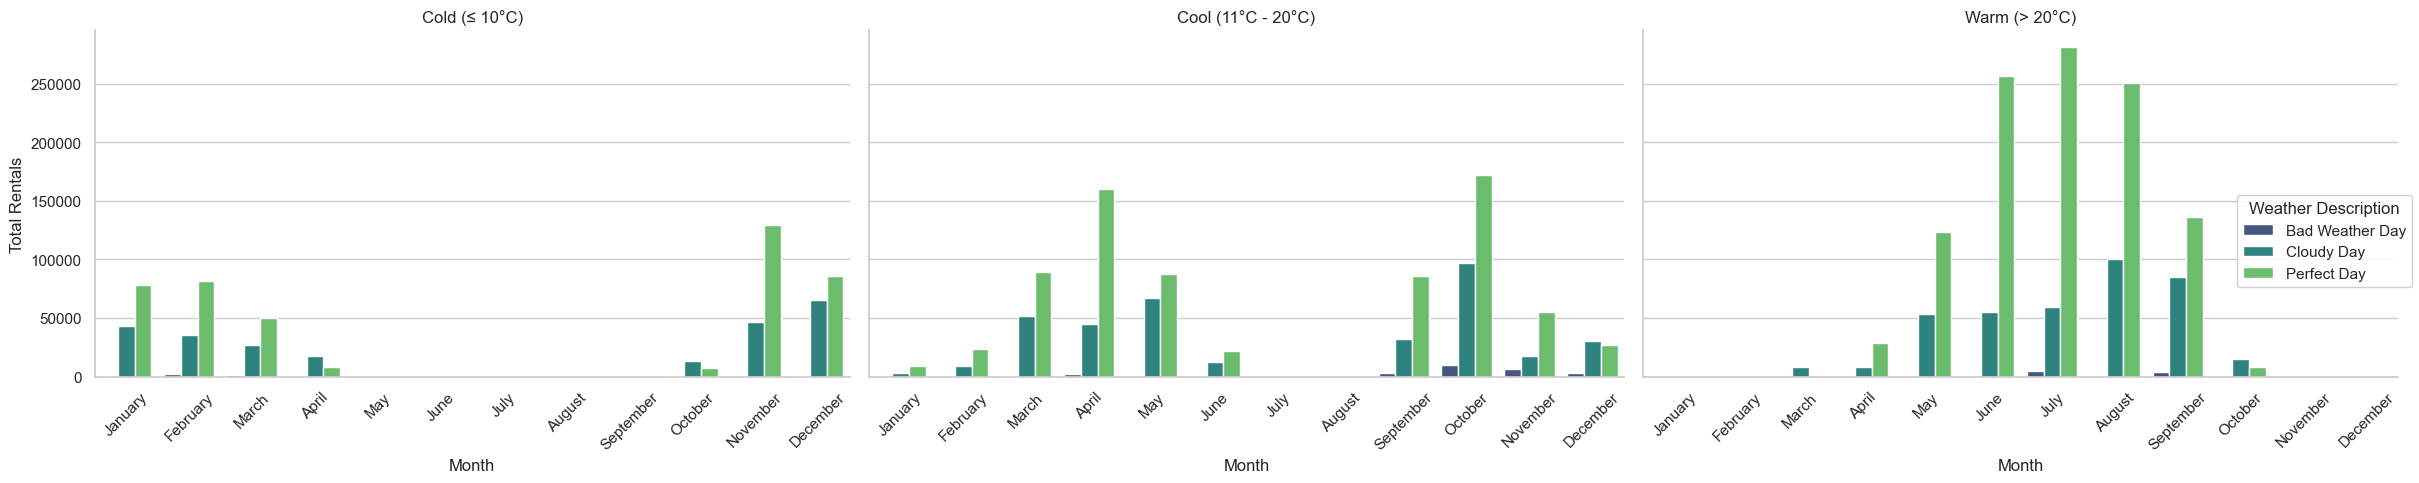

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar chart
sns.set(style="whitegrid")

g = sns.catplot(
    data=weather_temp_stats,
    kind="bar",
    x="Month",
    y="Total_Rentals",
    hue="weather_description",
    col="temp_category",
    col_wrap=3,  # Adjust based on the number of temperature categories
    height=5,
    aspect=1.5,
    palette="viridis",
    sharex=False  # Ensures each subplot has its own x-axis
)

# Adjust the plot
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Total Rentals")
g._legend.set_title("Weather Description")

# Make the legend background opaque
g._legend.set_frame_on(True)  # Turn on the legend frame
g._legend.get_frame().set_facecolor('white')  # Set the background color
g._legend.get_frame().set_alpha(0.9)  # Set the transparency (1.0 is fully opaque)


# Set the xticks and rotate labels
for ax in g.axes.flat:
    ax.set_xticks(range(len(month_mapping)))  # Set the number of ticks equal to the number of months
    ax.set_xticklabels(month_mapping.values(), rotation=45)  # Rotate tick labels

plt.tight_layout()

# Save as PNG
g.savefig("./data/weather_rentals_fixed_plot.png")

# Display the updated plot and save the new file
plt.show()

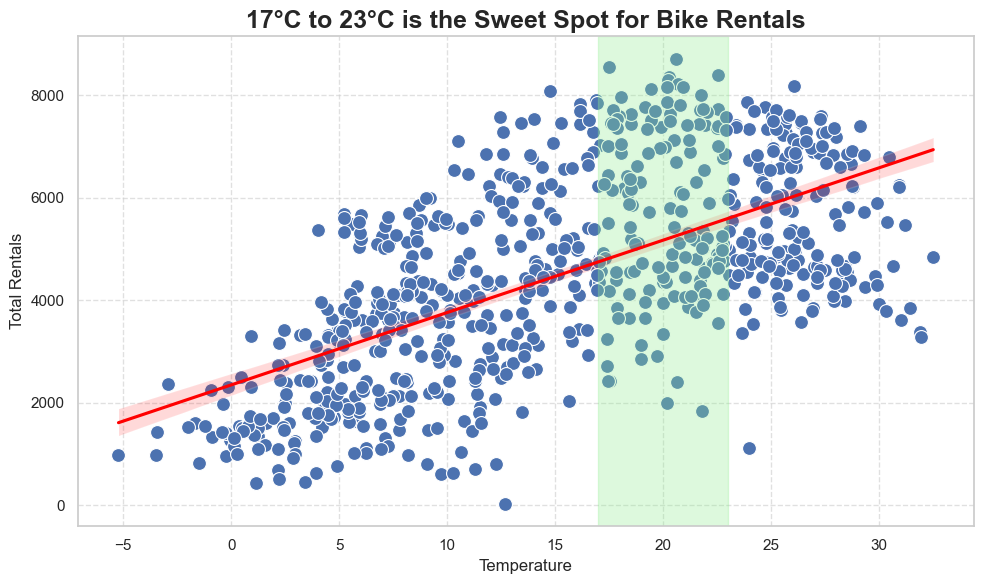

In [241]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))

# Create a scatter plot showing the relationship between temperature and total rentals
sns.scatterplot(x='temp_celsius', y='cnt', data=data, s=100)

# Add a line of best fit using seaborn's regplot to show the trend
sns.regplot(x='temp_celsius', y='cnt', data=data, scatter=False, color='red')

# Highlight the "sweet spot" temperature range
plt.axvspan(17, 23, color='lightgreen', alpha=0.3, label='17-23°C Sweet Spot')

# Customize the plot
plt.title('17°C to 23°C is the Sweet Spot for Bike Rentals', fontsize=18, fontweight='bold')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Style the axes and labels
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("./data/sweet_spot_bike_rentals_plot.png")


# Show the plot
plt.tight_layout()
plt.show()


## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!

# Project

In [64]:
# Load the random vehicle location data
vehicle_df = pd.read_csv('cleaned_vehicle_data.csv')
vehicle_df.head()

,latitude,longitude,vehicle_type
0,52.534653,13.427584,scooter
1,52.522841,13.414398,unknown
2,52.507589,13.371446,scooter
3,52.503778,13.390401,bike
4,52.524235,13.406673,bike


In [66]:
# Load weather data to pandas dataframe
weather_df = pd.DataFrame(weather_data['data'])

# Convert 'date' to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Show the first few rows of the cleaned weather data
weather_df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-01-01,14.5,10.5,16.2,0.0,0.0,217.0,16.9,49.0,1015.3,0
1,2023-01-02,13.1,9.1,16.0,0.1,0.0,216.0,16.2,49.3,1016.1,0
2,2023-01-03,5.6,1.7,9.4,0.0,0.0,251.0,12.2,37.8,1027.2,288
3,2023-01-04,7.1,2.8,11.2,18.1,0.0,203.0,18.4,53.3,1015.3,0
4,2023-01-05,8.2,2.3,10.4,1.7,0.0,290.0,26.6,64.8,1013.2,72


In [68]:
# Load places data
# Convert Foursquare data into a DataFrame
foursquare_data = []
for place in places_data['results']:
    foursquare_data.append({
        'fsq_id': place['fsq_id'],
        'name': place['name'],
        'category': place['categories'][0]['name'],
        'latitude': place['geocodes']['main']['latitude'],
        'longitude': place['geocodes']['main']['longitude'],
        # Use .get() to handle missing 'address'
        'address': place['location'].get('address', 'No address available'),
        'locality': place['location'].get('locality', 'Unknown locality')
    })

places_df = pd.DataFrame(foursquare_data)
places_df.head()

,fsq_id,name,category,latitude,longitude,address,locality
0,5c336440a30619002c17d14a,Block House,Steakhouse,52.520591,13.405309,Karl-Liebknecht-Str. 7,Berlin
1,4d34488a2c76a143335383c7,Neptunbrunnen,Fountain,52.519583,13.406861,Karl-Liebknecht-Str. 8,Berlin
2,55509010498e1ed2ce2d90f0,Waffel oder Becher,Coffee Shop,52.521110,13.403922,Spandauer Str. 2,Berlin
3,4adcda7ef964a520c54721e3,Marienkirche,Church,52.520604,13.407174,Karl-Liebknecht-Str. 8,Berlin
4,4bebeeb16295c9b6b8388808,Marx-Engels-Forum,Park,52.518538,13.406295,No address available,Berlin


In [70]:
# google directions
# Request Directions
directions_url = f'https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={google_api_key}'
response = requests.get(directions_url)
directions_data = response.json()

# Extract route and duration
if directions_data['status'] == 'OK':
    route = directions_data['routes'][0]['legs'][0]
    print(f"Route summary: {route['distance']['text']} in {route['duration']['text']}")
else:
    print(f"Error fetching directions: {directions_data['status']}")

Route summary: 1.1 km in 3 mins


## Merging datasets

In [73]:
def find_nearest_place(vehicle_lat, vehicle_lon, places_df):
    min_distance = float('inf')
    nearest_place = None
    
    for idx, place in places_df.iterrows():
        place_coords = (place['latitude'], place['longitude'])
        vehicle_coords = (vehicle_lat, vehicle_lon)
        
        # Calculate distance
        distance = geodesic(vehicle_coords, place_coords).meters
        
        if distance < min_distance:
            min_distance = distance
            nearest_place = place
            
    return nearest_place, min_distance

# Adding nearby places and distances to vehicle_df
vehicle_places_data = []
for idx, vehicle in vehicle_df.iterrows():
    nearest_place, distance = find_nearest_place(vehicle['latitude'], vehicle['longitude'], places_df)
    vehicle_places_data.append({
        'latitude': vehicle['latitude'],
        'longitude': vehicle['longitude'],
        'vehicle_type': vehicle['vehicle_type'],
        'nearest_place_name': nearest_place['name'] if nearest_place is not None else 'None',
        'place_category': nearest_place['category'] if nearest_place is not None else 'None',
        'distance_to_place': distance if nearest_place is not None else 'N/A'
    })

# Create a DataFrame with the results
vehicle_places_df = pd.DataFrame(vehicle_places_data)
vehicle_places_df.head()

,latitude,longitude,vehicle_type,nearest_place_name,place_category,distance_to_place
0,52.534653,13.427584,scooter,Wasserkaskaden am Fernsehturm,Fountain,2078.898631
1,52.522841,13.414398,unknown,Wasserkaskaden am Fernsehturm,Fountain,513.000014
2,52.507589,13.371446,scooter,Berlin Cathedral (Berliner Dom),Structure,2382.388907
3,52.503778,13.390401,bike,Berlin Cathedral (Berliner Dom),Structure,1850.674084
4,52.524235,13.406673,bike,Waffel oder Becher,Coffee Shop,394.690963


In [74]:
# Use today's weather for all vehicles
today_weather = weather_df.iloc[0]  # Assuming first row is today's weather

# Add weather info to each vehicle in the dataset
vehicle_places_df['tavg'] = today_weather['tavg']
vehicle_places_df['tmin'] = today_weather['tmin']
vehicle_places_df['tmax'] = today_weather['tmax']
vehicle_places_df['prcp'] = today_weather['prcp']
vehicle_places_df['wspd'] = today_weather['wspd']
vehicle_places_df['wpgt'] = today_weather['wpgt']
vehicle_places_df['tsun'] = today_weather['tsun']

In [77]:
vehicle_places_df.head()

,latitude,longitude,vehicle_type,nearest_place_name,place_category,distance_to_place,tavg,tmin,tmax,prcp,wspd,wpgt,tsun
0,52.534653,13.427584,scooter,Wasserkaskaden am Fernsehturm,Fountain,2078.898631,14.5,10.5,16.2,0.0,16.9,49.0,0
1,52.522841,13.414398,unknown,Wasserkaskaden am Fernsehturm,Fountain,513.000014,14.5,10.5,16.2,0.0,16.9,49.0,0
2,52.507589,13.371446,scooter,Berlin Cathedral (Berliner Dom),Structure,2382.388907,14.5,10.5,16.2,0.0,16.9,49.0,0
3,52.503778,13.390401,bike,Berlin Cathedral (Berliner Dom),Structure,1850.674084,14.5,10.5,16.2,0.0,16.9,49.0,0
4,52.524235,13.406673,bike,Waffel oder Becher,Coffee Shop,394.690963,14.5,10.5,16.2,0.0,16.9,49.0,0


In [79]:
# Save the final DataFrame to a CSV file
vehicle_places_df.to_csv('./data/final_vehicle_places_weather_data.csv', index=False)